# Introdução ao SQL

## Recapitulando

Comandos apresentados na aula passada.

## Objetivos

Na aula de hoje, veremos comandos para manipulação de mais de uma tabela em uma consulta SQL.

Ao final desta aula o aluno deverá conhecer:

- O conceito de junção e produto cartesiano.
- Unir resultados utilizando o UNION.

# Carregando um novo banco de dados

Nessa aula, utilizaremos o script <b>escola.sql</b> localizado na pasta <b>bancodedados\material\databases</b> do curso.

Exemplo de uma uma escola.

Tabela turma:

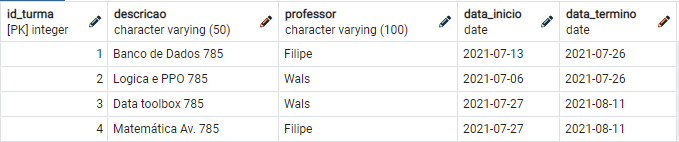

Tabela aluno:

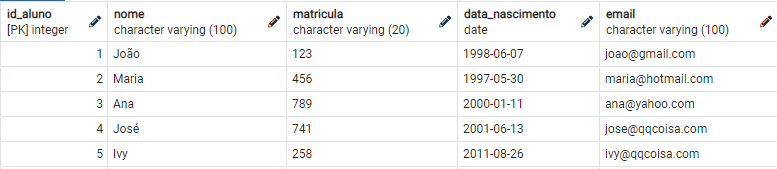

Tabela turma_aluno:

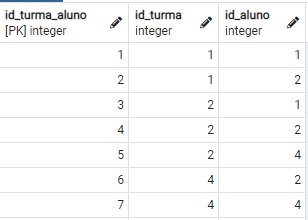

# SQL: JOINS

## INNER

Retorna somente as tuplas que tenham valores correspondentes em ambas as tabelas.

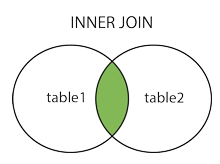

**Exemplo:** Enriquecer a tabela `turma_aluno` com os dados dos alunos.

    SELECT * 
    FROM turma_aluno
    INNER JOIN alunos ON alunos.id_aluno = turma_aluno.id_aluno;

Resultado:

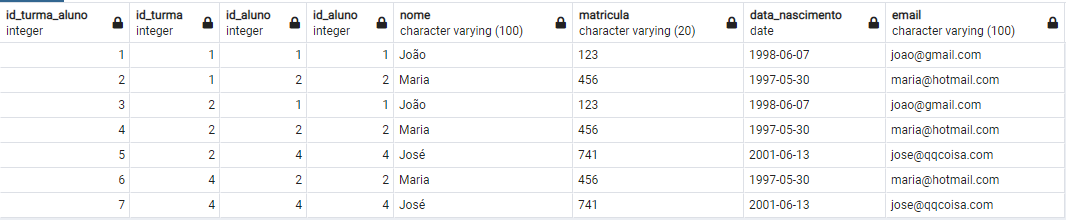

## LEFT

Retorna **todas as tuplas da tabela** da **esquerda** mais as tuplas correspondentes da tabela da direita.

Tuplas da tabela da esquerda que não tenham correspondente na direita, armazenam valores nulos para as colunas vindas da tabela da direita.

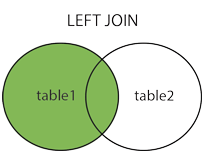

**Exemplo:** Enriquecer a tabela `aluno` com os dados da tabela `turma_aluno` via `left_join`. 
Em quais turmas os alunos estão matriculados?

    SELECT * 
    FROM alunos
    LEFT JOIN turma_aluno on alunos.id_aluno = turma_aluno.id_aluno;

## RIGHT

Retorna **todas as tuplas da tabela** da **direita** mais as tuplas correspondentes da tabela da esquerda.

Tuplas da tabela da direita que não tenham correspondente na esquerda, armazenam valores nulos para as colunas vindas da tabela da esquerda.

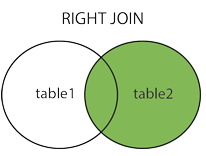

**Exemplo:** Enriquecer a tabela `aluno` com os dados da tabela `turma_aluno` via `right_join`. 

    SELECT * 
    FROM turma_aluno
    RIGHT JOIN alunos on alunos.id_aluno = turma_aluno.id_aluno;

Resultado:

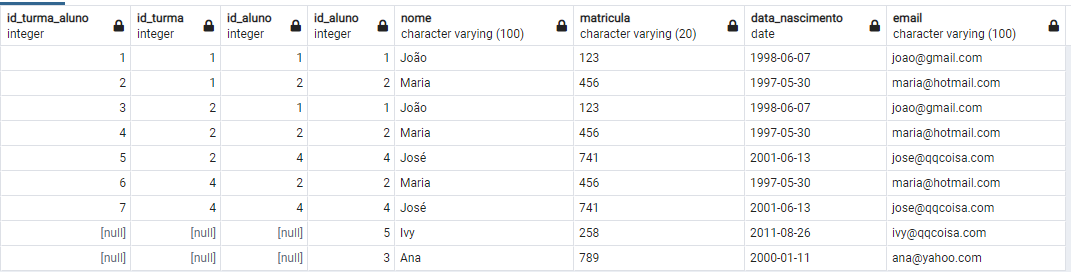

## FULL OUTER

Retorna **todos os dados** das duas tabelas.  

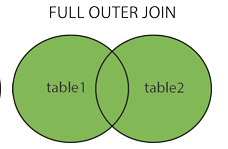

**Exemplo:** Encontrar alunos que não estejam matriculados! 

Juntar as tabelas `aluno` com os dados da tabela `turma_aluno`  via `outer_join`. 

    SELECT * 
    FROM turma_aluno
    FULL JOIN turmas on turmas.id_turma = turma_aluno.id_turma;

Resultado:

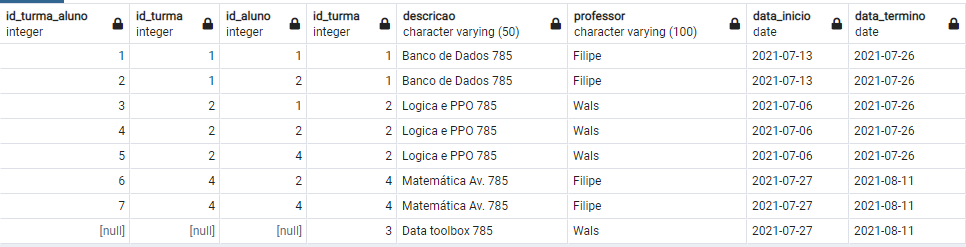

# Multiplos Joins e o uso de ALIAS

Faça uma query que retorne uma tabela no sequinte formato:

` id_turma_aluno | nome_do_curso | professor | nome_do_aluno | matricula`

Query:

    SELECT 
    turma_aluno.id_turma_aluno,
    turmas.descricao as nome_do_curso,
    turmas.professor,
    alunos.nome as nome_do_aluno,
    alunos.matricula
    FROM turma_aluno
    INNER JOIN turmas on turmas.id_turma = turma_aluno.id_turma
    INNER JOIN alunos on alunos.id_aluno = turma_aluno.id_turma;

    SELECT 
    ta.id_turma_aluno,
    tu.descricao as nome_do_curso,
    tu.professor,
    al.nome as nome_do_aluno,
    al.matricula
    FROM turma_aluno as ta
    INNER JOIN turmas as tu on tu.id_turma = ta.id_turma
    INNER JOIN alunos as al on al.id_aluno = ta.id_turma;

    SELECT 
    ta.id_turma_aluno,
    tu.descricao as nome_do_curso,
    tu.professor,
    al.nome as nome_do_aluno,
    al.matricula
    FROM turma_aluno ta
    INNER JOIN turmas tu on tu.id_turma = ta.id_turma
    INNER JOIN alunos al on al.id_aluno = ta.id_turma;

Resultado:

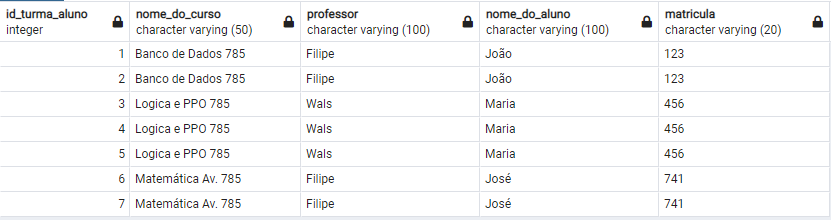

# Sumarizando, agregando e ordenando dados de múltiplas tabelas

Faça um relatório que apresente o número de alunos por turma. O resultado deve ser no formato `nome_do_curso | numero_de_alunos`.

Query:

    SELECT 
    tu.descricao nome_do_curso, 
    count(ta.id_aluno) numero_de_alunos 
    FROM turma_aluno as ta
    JOIN turmas as tu on tu.id_turma = ta.id_turma
    group by tu.descricao;

Resultado:

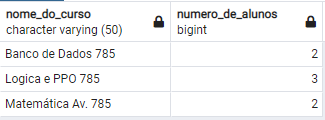

Quantos alunos um professor atende? O resultado deve ser no formato `nome_do_professor | numero_de_alunos`. Note que o mesmo aluno pode estar em mais de uma turma!

Query:

    SELECT
    tu.professor,
    COUNT(DISTINCT(ta.id_aluno))
    FROM turma_aluno ta
    JOIN turmas tu on tu.id_turma = ta.id_turma
    GROUP BY tu.professor;

Resultado:

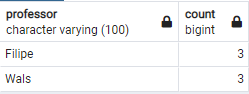

# SQL: UNION & UNION ALL

Juntam os resultados de duas queries em uma única saída.

**UNION:** Remove duplicados (linhas cujos valores em todas as colunas são os mesmos);

**UNION ALL:** Não remove duplicados.

**Exemplo prático:** Agregar informações de transações de cartões de crédito e débido,que geralmente são armazenadas em tabelas diferentes.

**Exemplo:** Una os resultados das duas queries acima.

Query:

    -- UNION 
    SELECT 
    tu.descricao nome_do_curso, 
    count(ta.id_aluno) numero_de_alunos 
    FROM turma_aluno as ta
    JOIN turmas as tu on tu.id_turma = ta.id_turma
    group by tu.descricao

    UNION

    SELECT
    tu.professor,
    COUNT(DISTINCT(ta.id_aluno))
    FROM turma_aluno ta
    JOIN turmas tu on tu.id_turma = ta.id_turma
    GROUP BY tu.professor;

Resultado:

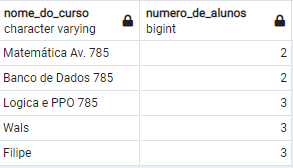

Query:
    
    -- UNION VS UNION ALL
    SELECT 'Patricia'
    UNION
    SELECT 'Patricia'

    SELECT 'Patricia'
    UNION ALL
    SELECT 'Patricia'

Resultado: 

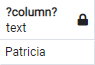
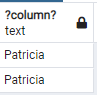

# Execícios

Executar as consultas abaixo em SQL e enviar o arquivo sql para o e-mail do professor da seguinte forma:

E-mail: williamtx1987@gmail.com

Assunto: 767_firstname_lastname_aula04-p4

Escrever um comentário antes de cada comando indicando a qual exercício ele se refere.

Utilizando o database `estados_cidades` localizado na pasta <b>bancodedados\material\databases</b> do material do curso:

### Q1

Faça um relatório que traga o número de cidades por estado (nome por extenso) e ordene:
1. Ordem alfabética por nome do estado;
1. Do maior para o menor número de municípios.

### Q2

Faça um relatório que gere uma lista com todas as cidades (nome por extenso) com nomes repetidos.

### Q3

Faça um relatório que gere uma lista com os municipíos repetidos por estados (nome por extenso): `estado|cidade|numero`.

### Q4

No banco de dados do `northwind`, obtenha:

1. Uma lista dos 10 clientes que realizaram o maior número de pedidos, bem como o número de pedidos de cada, ordenados em ordem decrescente de nº de pedidos. 
1. Uma tabela com o valor médio das vendas em cada mês, ordenando do mês com mais vendas ao mês com menos vendas.